In [1]:
from pathlib import Path

import pandas as pd

In [12]:
rootdir = Path("/scratch/jetzeschuurman/imagenet/logs/efficientnet_b2-256-tucker-0.75-k1x1/")
exp_0 = "20211220-125526"
exp_3 = "20211220-182532"
exp_4 = "20211220-203454"

sum_0 = pd.read_csv(rootdir/exp_0/"summary.csv")
sum_3 = pd.read_csv(rootdir/exp_3/"summary.csv")
# sum_4 = pd.read_csv(rootdir/exp_4/"summary.csv")


m_sum_0 = pd.read_csv(rootdir/exp_0/"micro_summary.csv") # TODO this file is a mess
m_sum_3 = pd.read_csv(rootdir/exp_3/"micro_summary.csv", header=None)
# m_sum_4 = pd.read_csv(rootdir/exp_4/"micro_summary.csv")


In [22]:
sum_0.set_index('epoch', inplace=True)
sum_3.set_index('epoch', inplace=True)

KeyError: "None of ['epoch'] are in the columns"

In [23]:
summary = sum_0.append(sum_3)

In [24]:
summary

,train_loss,eval_loss,eval_top1,eval_top5
epoch,,,,
0,5.402969,3.493483,28.702737,53.972277
1,4.675562,2.987208,37.037638,63.202143
2,4.429930,2.716685,41.835920,67.830814
3,4.270577,2.573699,44.447757,70.085243


<AxesSubplot:xlabel='epoch', ylabel='loss'>

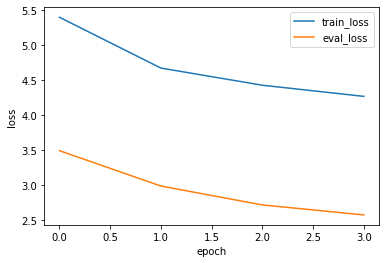

In [27]:
summary[['train_loss', 'eval_loss']].plot(ylabel='loss')

<AxesSubplot:xlabel='epoch', ylabel='accuracy (%)'>

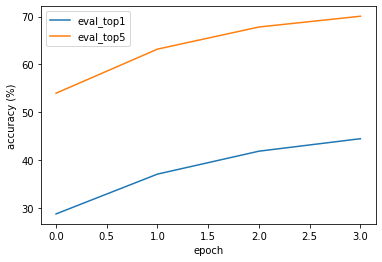

In [28]:
summary[['eval_top1','eval_top5']].plot(ylabel='accuracy (%)')

In [36]:
m_sum_0.set_index('update_step', inplace=True)

In [37]:
m_sum_3.rename(columns={0:'update_step', 1:'micro_train_loss'}, inplace=True)
m_sum_3.set_index('update_step', inplace=True)

In [39]:
m_sum = m_sum_0.append(m_sum_3)

<AxesSubplot:xlabel='update step', ylabel='loss'>

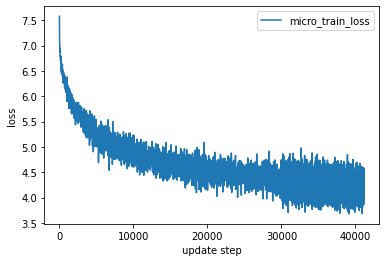

In [43]:
m_sum[['micro_train_loss']].plot(ylabel='loss', xlabel='update step')